In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Import the MNIST Dataset

In [10]:
from keras.datasets import mnist
(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()

In [11]:
print(Xtrain.shape)
print("Training Set: %s images of %s x %s pixels each" %(Xtrain.shape[0],Xtrain.shape[1],Xtrain.shape[2]))

(60000, 28, 28)
Training Set: 60000 images of 28 x 28 pixels each


In [12]:
print(Xtest.shape)
print("Training Set: %s images of %s x %s pixels each" %(Xtest.shape[0],Xtest.shape[1],Xtest.shape[2]))

(10000, 28, 28)
Training Set: 10000 images of 28 x 28 pixels each


#### Attempt to display some images in the dataset

#### Training Set

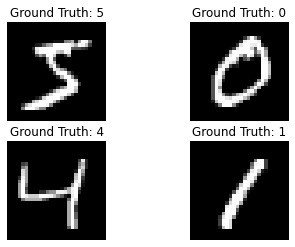

In [13]:
for i in range(4):
    plt.subplot(221 + i)
    plt.imshow(Xtrain[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title("Ground Truth: " + str(Ytrain[i]) )
plt.show()

#### Test Set

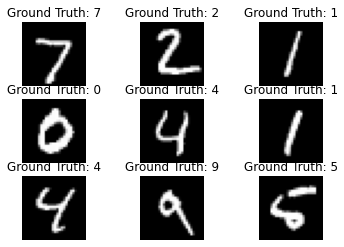

In [14]:
for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(Xtest[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title("Ground Truth: " + str(Ytest[i]) )
plt.show()    

In [15]:
Ytest[:9]

array([7, 2, 1, 0, 4, 1, 4, 9, 5], dtype=uint8)

#### Preprocessing

In [16]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, KFold

In [17]:
Xtrain_reshape = Xtrain.reshape(Xtrain.shape[0],-1)
Xtest_reshape = Xtest.reshape(Xtest.shape[0],-1)

scaler = preprocessing.MinMaxScaler()
scaler.fit(Xtrain_reshape)
Xtrain_reshape = scaler.transform(Xtrain_reshape)
Xtest_reshape = scaler.transform(Xtest_reshape)

### A. Building different models for the same problem

### <font color=red>Takeaway 1 <br> <br> Using different models for the same problem: Logistic Regression, Random Forest, MLP, CNNs</font>

#### 1. Logistic Regression (Classifier)

In [18]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(verbose=2)
LR.fit(Xtrain_reshape[:10000,:],Ytrain[:10000])
#LR.fit(Xtrain_reshape,Ytrain)
print("Training Accuracy: " + str(accuracy_score(LR.predict(Xtrain_reshape[:10000,:]),Ytrain[:10000])))
print("Test Accuracy: " + str(accuracy_score(LR.predict(Xtest_reshape),Ytest)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training Accuracy: 0.9664
Test Accuracy: 0.9053


C:\Users\Ong Ming Lun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s finished


#### 2. Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
RandForest = RandomForestClassifier(n_estimators=20,max_depth=8,min_samples_leaf=50)
RandForest.fit(Xtrain_reshape[:1000,:],Ytrain[:10a00])
print("Training Accuracy: " + str(accuracy_score(RandForest.predict(Xtrain_reshape[:1000,:]),Ytrain[:1000])))
print("Test Accuracy: " + str(accuracy_score(RandForest.predict(Xtest_reshape),Ytest)))

Training Accuracy: 0.766
Test Accuracy: 0.6751


#### <font color=red>Takeaway 2 <br> <br> Amount of Training Input Data <br> <br> More data gets you more accurate results.</font>

In [20]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=200,max_depth=25,min_samples_leaf=7)
RF.fit(Xtrain_reshape[:10000,:],Ytrain[:10000])
print("Training Accuracy: " + str(accuracy_score(RF.predict(Xtrain_reshape[:10000,:]),Ytrain[:10000])))
print("Test Accuracy: " + str(accuracy_score(RF.predict(Xtest_reshape),Ytest)))

Training Accuracy: 0.9793
Test Accuracy: 0.9393


#### 3. Multilayer Perceptron Classifier

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
NN = keras.Sequential()
NN.add(Dense(50, activation='relu'))
NN.add(Dropout(0.7))
NN.add(Dense(10, activation='relu'))
NN.add(Dense(10, activation='softmax'))

NN.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.0002),metrics=['accuracy'])
NN.fit(Xtrain_reshape[:10000,:],Ytrain[:10000],batch_size=200,epochs=100)

Epoch 1/100
50/50 [==============================] - 2s 5ms/step - loss: 2.3101 - accuracy: 0.1139
Epoch 2/100
50/50 [==============================] - 0s 5ms/step - loss: 2.1963 - accuracy: 0.1487
Epoch 3/100
50/50 [==============================] - 0s 5ms/step - loss: 2.0810 - accuracy: 0.2089
Epoch 4/100
50/50 [==============================] - 0s 5ms/step - loss: 1.9543 - accuracy: 0.2665
Epoch 5/100
50/50 [==============================] - 0s 5ms/step - loss: 1.8402 - accuracy: 0.3150
Epoch 6/100
50/50 [==============================] - 0s 8ms/step - loss: 1.7318 - accuracy: 0.3734
Epoch 7/100
50/50 [==============================] - 0s 9ms/step - loss: 1.6580 - accuracy: 0.4226
Epoch 8/100
50/50 [==============================] - 1s 10ms/step - loss: 1.5849 - accuracy: 0.4601
Epoch 9/100
50/50 [==============================] - 0s 9ms/step - loss: 1.5132 - accuracy: 0.4923
Epoch 10/100
50/50 [==============================] - 1s 10ms/step - loss: 1.4555 - accuracy: 0.5209
Epoch 1

In [38]:
print("NN")
print("Training Accuracy: " + str(accuracy_score(np.argmax(NN.predict(Xtrain_reshape[:10000,:]),axis=1),Ytrain[:10000])))
print("Test Accuracy: " + str(accuracy_score(np.argmax(NN.predict(Xtrain_reshape[:1000,:]),axis=1),Ytrain[:1000])))

NN
313/313 [==============================] - 1s 3ms/step
Training Accuracy: 0.9374
32/32 [==============================] - 0s 2ms/step
Test Accuracy: 0.937


#### <font color=red>Takeaway 3 <br> <br> Do not mix training and test data!!!</font>

In [39]:
NN_deep = keras.Sequential()
NN_deep.add(Dense(100, activation='relu'))
NN_deep.add(Dense(10, activation='softmax'))

NN_deep.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.003),metrics=['accuracy'])
NN_deep.fit(Xtrain_reshape,Ytrain,batch_size=200,epochs=300)

Epoch 1/300
300/300 [==============================] - 3s 6ms/step - loss: 0.2976 - accuracy: 0.9140
Epoch 2/300
300/300 [==============================] - 2s 8ms/step - loss: 0.1295 - accuracy: 0.9615
Epoch 3/300
300/300 [==============================] - 2s 7ms/step - loss: 0.0884 - accuracy: 0.9738
Epoch 4/300
300/300 [==============================] - 2s 8ms/step - loss: 0.0677 - accuracy: 0.9794
Epoch 5/300
300/300 [==============================] - 2s 7ms/step - loss: 0.0535 - accuracy: 0.9835
Epoch 6/300
300/300 [==============================] - 2s 6ms/step - loss: 0.0442 - accuracy: 0.9861
Epoch 7/300
300/300 [==============================] - 2s 6ms/step - loss: 0.0363 - accuracy: 0.9891
Epoch 8/300
300/300 [==============================] - 2s 6ms/step - loss: 0.0291 - accuracy: 0.9916
Epoch 9/300
300/300 [==============================] - 2s 8ms/step - loss: 0.0255 - accuracy: 0.9921
Epoch 10/300
300/300 [==============================] - 2s 7ms/step - loss: 0.0219 - accura

Epoch 80/300
300/300 [==============================] - 2s 8ms/step - loss: 9.0577e-06 - accuracy: 1.0000
Epoch 81/300
300/300 [==============================] - 2s 6ms/step - loss: 8.3330e-06 - accuracy: 1.0000
Epoch 82/300
300/300 [==============================] - 2s 8ms/step - loss: 7.6348e-06 - accuracy: 1.0000
Epoch 83/300
300/300 [==============================] - 2s 7ms/step - loss: 6.9473e-06 - accuracy: 1.0000
Epoch 84/300
300/300 [==============================] - 2s 7ms/step - loss: 6.3760e-06 - accuracy: 1.0000
Epoch 85/300
300/300 [==============================] - 2s 7ms/step - loss: 5.7556e-06 - accuracy: 1.0000
Epoch 86/300
300/300 [==============================] - 2s 8ms/step - loss: 5.2774e-06 - accuracy: 1.0000
Epoch 87/300
300/300 [==============================] - 2s 7ms/step - loss: 4.7715e-06 - accuracy: 1.0000
Epoch 88/300
300/300 [==============================] - 2s 7ms/step - loss: 4.3167e-06 - accuracy: 1.0000
Epoch 89/300
300/300 [========================

300/300 [==============================] - 3s 9ms/step - loss: 3.1650e-09 - accuracy: 1.0000
Epoch 234/300
300/300 [==============================] - 2s 8ms/step - loss: 3.0458e-09 - accuracy: 1.0000
Epoch 235/300
300/300 [==============================] - 2s 8ms/step - loss: 2.9842e-09 - accuracy: 1.0000
Epoch 236/300
300/300 [==============================] - 2s 7ms/step - loss: 2.9027e-09 - accuracy: 1.0000
Epoch 237/300
300/300 [==============================] - 2s 7ms/step - loss: 2.8749e-09 - accuracy: 1.0000
Epoch 238/300
300/300 [==============================] - 2s 7ms/step - loss: 2.7955e-09 - accuracy: 1.0000
Epoch 239/300
300/300 [==============================] - 2s 7ms/step - loss: 2.7299e-09 - accuracy: 1.0000
Epoch 240/300
300/300 [==============================] - 2s 7ms/step - loss: 2.6842e-09 - accuracy: 1.0000
Epoch 241/300
300/300 [==============================] - 2s 7ms/step - loss: 2.6226e-09 - accuracy: 1.0000
Epoch 242/300
300/300 [============================

In [40]:
print("NN")
print("Training Accuracy: " + str(accuracy_score(np.argmax(NN_deep.predict(Xtrain_reshape[:10000,:]),axis=1),Ytrain[:10000])))
print("Test Accuracy: " + str(accuracy_score(np.argmax(NN_deep.predict(Xtest_reshape),axis=1),Ytest)))

NN
313/313 [==============================] - 1s 3ms/step
Training Accuracy: 1.0
313/313 [==============================] - 1s 3ms/step
Test Accuracy: 0.981


#### <font color=red>Takeaway 4 <br> <br> If you're not careful... your model can overfit</font>

#### <font color=red>A few things can be done to prevent overfitting: hyperparameter optimization, reducing the learning_rate, reducing the network size/parameters used, dropout </font>

#### <font color=red>For this instance, we attempt dropout to randomly set the nodes in the network to zero.</font>

In [41]:
MLP = keras.Sequential()
MLP.add(Dense(50, activation='relu'))
MLP.add(Dropout(0.2))
MLP.add(Dense(30, activation='relu'))
MLP.add(Dropout(0.2))
MLP.add(Dense(10, activation='softmax'))

MLP.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.0002),metrics=['accuracy'])
MLP.fit(Xtrain_reshape,Ytrain,batch_size=200,epochs=100)

Epoch 1/100
300/300 [==============================] - 3s 5ms/step - loss: 1.5739 - accuracy: 0.4864
Epoch 2/100
300/300 [==============================] - 2s 8ms/step - loss: 0.7394 - accuracy: 0.7773
Epoch 3/100
300/300 [==============================] - 2s 8ms/step - loss: 0.5668 - accuracy: 0.8309
Epoch 4/100
300/300 [==============================] - 2s 6ms/step - loss: 0.4834 - accuracy: 0.8560
Epoch 5/100
300/300 [==============================] - 2s 7ms/step - loss: 0.4359 - accuracy: 0.8708
Epoch 6/100
300/300 [==============================] - 2s 6ms/step - loss: 0.3975 - accuracy: 0.8829
Epoch 7/100
300/300 [==============================] - 2s 7ms/step - loss: 0.3652 - accuracy: 0.8939
Epoch 8/100
300/300 [==============================] - 2s 5ms/step - loss: 0.3445 - accuracy: 0.8987
Epoch 9/100
300/300 [==============================] - 2s 7ms/step - loss: 0.3268 - accuracy: 0.9039
Epoch 10/100
300/300 [==============================] - 2s 6ms/step - loss: 0.3100 - accura

In [42]:
print("MLP")
print("Training Accuracy: " + str(accuracy_score(np.argmax(MLP.predict(Xtrain_reshape[:10000,:]),axis=1),Ytrain[:10000])))
print("Test Accuracy: " + str(accuracy_score(np.argmax(MLP.predict(Xtest_reshape),axis=1),Ytest)))

MLP
313/313 [==============================] - 2s 5ms/step
Training Accuracy: 0.9892
313/313 [==============================] - 1s 3ms/step
Test Accuracy: 0.9725


In [43]:
MLP.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                39250     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 30)                1530      
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                310       
                                                                 
Total params: 41,090
Trainable params: 41,090
Non-trainable params: 0
_________________________________________________________________


#### 4. Convolutional Neural Network Classifier

In [44]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
CNN = keras.Sequential()
CNN.add(Conv2D(24, (3, 3), activation='relu', input_shape=(Xtrain.shape[1], Xtrain.shape[2], 1)))
CNN.add(MaxPooling2D((2, 2)))
CNN.add(Conv2D(32, (4, 4), activation='relu'))
CNN.add(MaxPooling2D((2, 2)))
CNN.add(Conv2D(32, (3, 3), activation='relu'))
CNN.add(Flatten())
CNN.add(Dense(10, activation='softmax'))
CNN.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(0.0005),metrics=['accuracy'])
CNN.fit(Xtrain_reshape.reshape((Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[1], 1)),Ytrain,batch_size=100,epochs=30)

Epoch 1/30
600/600 [==============================] - 30s 47ms/step - loss: 0.3904 - accuracy: 0.8825
Epoch 2/30
600/600 [==============================] - 29s 48ms/step - loss: 0.1028 - accuracy: 0.9694
Epoch 3/30
600/600 [==============================] - 29s 48ms/step - loss: 0.0736 - accuracy: 0.9774
Epoch 4/30
600/600 [==============================] - 29s 48ms/step - loss: 0.0594 - accuracy: 0.9813
Epoch 5/30
600/600 [==============================] - 29s 48ms/step - loss: 0.0498 - accuracy: 0.9842
Epoch 6/30
600/600 [==============================] - 29s 48ms/step - loss: 0.0434 - accuracy: 0.9864
Epoch 7/30
600/600 [==============================] - 29s 48ms/step - loss: 0.0394 - accuracy: 0.9881
Epoch 8/30
600/600 [==============================] - 29s 48ms/step - loss: 0.0348 - accuracy: 0.9892
Epoch 9/30
600/600 [==============================] - 29s 48ms/step - loss: 0.0309 - accuracy: 0.9904
Epoch 10/30
600/600 [==============================] - 29s 48ms/step - loss: 0.028

In [45]:
print("CNN")
print("Training Accuracy: " + str(accuracy_score(np.argmax(CNN.predict(Xtrain_reshape.reshape(Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[1], 1)),axis=1),Ytrain)))
print("Test Accuracy: " + str(accuracy_score(np.argmax(CNN.predict(Xtest_reshape.reshape(Xtest.shape[0], Xtest.shape[1], Xtest.shape[1], 1)),axis=1),Ytest)))


CNN
1875/1875 [==============================] - 19s 10ms/step
Training Accuracy: 0.9978166666666667
313/313 [==============================] - 3s 10ms/step
Test Accuracy: 0.9899


In [46]:
CNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        12320     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 flatten (Flatten)           (None, 288)              

In [47]:
CNN.save('CNN.h5')
#CNN_load = tf.keras.models.load_model('CNN.h5')
#print("Training Accuracy: " + str(accuracy_score(CNN_load.predict_classes( Xtrain_reshape.reshape(Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[1], 1)  ),Ytrain)))
#print("Test Accuracy: " + str(accuracy_score(CNN_load.predict_classes( Xtest_reshape.reshape(Xtest.shape[0], Xtest.shape[1], Xtest.shape[1], 1)  ),Ytest)))

### Machine Learning Concepts

#### <font color=red> 5. Visualising some of the incorrect predictions </font>

In [50]:
wrong_indices = np.where(np.not_equal(np.argmax(MLP.predict(Xtest_reshape),axis=1), Ytest))


313/313 [==============================] - 1s 3ms/step


In [51]:
Ytest[wrong_indices]

array([2, 6, 8, 4, 6, 9, 2, 6, 7, 8, 1, 5, 8, 0, 4, 4, 8, 8, 8, 1, 3, 8,
       5, 1, 6, 6, 7, 2, 9, 4, 7, 4, 6, 9, 7, 9, 4, 9, 7, 5, 5, 8, 7, 5,
       6, 7, 7, 8, 4, 9, 6, 2, 7, 2, 3, 9, 8, 3, 5, 4, 7, 2, 6, 4, 8, 6,
       9, 4, 9, 8, 7, 7, 5, 4, 2, 4, 7, 2, 8, 3, 6, 4, 6, 8, 1, 9, 5, 8,
       9, 7, 0, 5, 9, 8, 9, 6, 2, 2, 4, 8, 2, 9, 6, 0, 9, 5, 8, 3, 3, 9,
       3, 3, 9, 6, 1, 5, 6, 8, 5, 4, 9, 6, 3, 5, 8, 8, 9, 8, 5, 4, 7, 7,
       5, 4, 7, 2, 7, 7, 6, 5, 9, 5, 5, 1, 4, 3, 7, 9, 9, 0, 8, 2, 7, 1,
       2, 1, 9, 2, 4, 2, 9, 5, 5, 9, 8, 9, 7, 8, 9, 6, 6, 5, 6, 4, 8, 2,
       3, 8, 3, 4, 9, 8, 3, 6, 9, 3, 7, 4, 9, 0, 7, 8, 7, 3, 3, 3, 1, 1,
       8, 1, 4, 3, 8, 9, 7, 7, 7, 4, 4, 3, 3, 3, 9, 9, 9, 9, 9, 9, 8, 6,
       9, 9, 2, 0, 8, 9, 0, 5, 2, 8, 1, 8, 0, 4, 2, 5, 3, 3, 2, 1, 1, 2,
       3, 8, 8, 6, 4, 4, 8, 4, 7, 7, 0, 7, 7, 8, 9, 0, 9, 2, 6, 6, 2, 2,
       5, 9, 8, 8, 2, 5, 2, 2, 6, 8, 3], dtype=uint8)

In [55]:
np.argmax(MLP.predict(Xtest_reshape)[wrong_indices],axis=1)

313/313 [==============================] - 1s 3ms/step


array([3, 5, 9, 6, 0, 7, 7, 0, 3, 2, 8, 3, 4, 6, 9, 9, 3, 2, 6, 3, 5, 9,
       4, 2, 0, 5, 2, 3, 3, 6, 9, 6, 1, 4, 2, 4, 9, 5, 1, 9, 7, 3, 9, 3,
       0, 3, 9, 7, 6, 3, 4, 6, 3, 0, 7, 3, 0, 5, 1, 2, 2, 8, 4, 9, 3, 0,
       4, 6, 5, 3, 2, 9, 6, 8, 7, 9, 9, 0, 5, 7, 0, 9, 1, 2, 2, 1, 6, 0,
       6, 2, 2, 9, 1, 3, 4, 4, 0, 4, 9, 2, 7, 0, 1, 8, 4, 8, 0, 2, 2, 5,
       7, 5, 1, 2, 2, 9, 0, 3, 7, 9, 1, 4, 2, 0, 0, 5, 3, 3, 8, 9, 2, 2,
       8, 6, 3, 4, 9, 1, 5, 0, 4, 6, 3, 3, 6, 5, 1, 4, 4, 2, 0, 7, 9, 7,
       6, 3, 7, 8, 9, 7, 7, 9, 9, 4, 4, 4, 2, 7, 1, 5, 2, 6, 8, 2, 4, 4,
       5, 7, 5, 6, 7, 3, 5, 0, 4, 2, 2, 9, 6, 8, 1, 4, 1, 2, 8, 8, 6, 8,
       6, 8, 7, 7, 6, 7, 9, 4, 0, 0, 9, 8, 8, 8, 5, 8, 8, 5, 3, 8, 9, 2,
       8, 7, 6, 7, 4, 5, 8, 3, 8, 7, 6, 7, 3, 8, 7, 3, 2, 2, 4, 8, 8, 8,
       5, 5, 4, 4, 9, 9, 6, 9, 2, 2, 5, 2, 2, 5, 4, 3, 7, 7, 3, 5, 8, 5,
       6, 4, 1, 5, 0, 0, 0, 3, 8, 6, 9], dtype=int64)

313/313 [==============================] - 1s 4ms/step


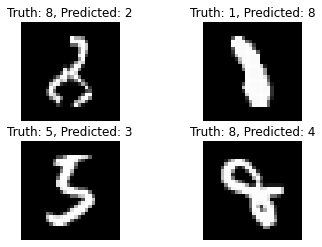

In [56]:
for i in range(4):
    plt.subplot(221 + i)
    plt.imshow(Xtest[wrong_indices[0][i+9]], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title("Truth: " + str(Ytest[wrong_indices[0][i+9]]) + ", Predicted: " +str(np.argmax(MLP.predict(Xtest_reshape),axis=1)[wrong_indices[0][i+9]])  )
plt.show()

313/313 [==============================] - 1s 3ms/step


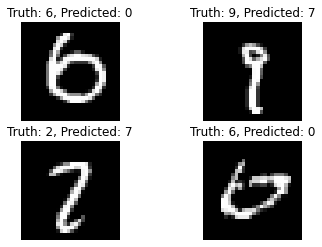

In [57]:
for i in range(4):
    plt.subplot(221 + i)
    plt.imshow(Xtest[wrong_indices[0][4+i]], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title("Truth: " + str(Ytest[wrong_indices[0][i+4]]) + ", Predicted: " +str(np.argmax(MLP.predict(Xtest_reshape),axis=1)[wrong_indices[0][i+4]])  )
plt.show()

#### <font color=red> Neural network parameters: Optimisers, number of epoches, network parameters, optimisers, batch size, different types of layers, convolutional layers VS dense layers </font>

#### <font color=red> Machine Learning concepts: Backpropagation, global vs local minima, explainability, hyperparameter optimization, activation functions, probability outputs </font>

#### For further reference: Stanford CS231n Convolutional Neural Networks, 2 Blue 1 Brown Neural Networks, Tensorflow Documentation